# Rheological analysis of time-water storage and loss modulus mastercurve
 
This notebook performs a rheological analysis at various temperatures and humidities, using logarithmic transformations, shift factors, master curve construction, and rheological modeling. The raw data was obtained from . R. Lennon, G. H. McKinley and J. W. Swan, Data-Centric Engineering, 2023, 4, e13.

We import:
- `pandas` for reading and manipulating data.
- `numpy` for mathematical computations like logarithmic transformations.
- `matplotlib.pyplot` for detailed visualizations.
- `re` for regex operations to extract concentration information from filenames.
- `mastercurves` and `pyRheo` for master curve construction and model fitting.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from mastercurves import MasterCurve
from mastercurves.transforms import Multiply
from pyRheo.oscillation_model import OscillationModel


# Load and process emulsion data
This cell loads experimental data from a CSV file containing:
- Angular Frequency (`omega`) in [rad/s].
- Storage Modulus (`G_prime`) in [Pa].
- Loss Modulus (`G_double_prime`) in [Pa].

The data is loaded using `pandas` and the first few rows are displayed for verification.

1. Data files for different temperatures are read.
2. Angular frequecy and storage and loss modulus data are logarithmically transformed for analysis.
4. Temperatures values are extracted from filenames using regex.
5. Log-transformed data is stored in separate lists for further analysis.


/tmp/ipykernel_155322/2380783150.py:86: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


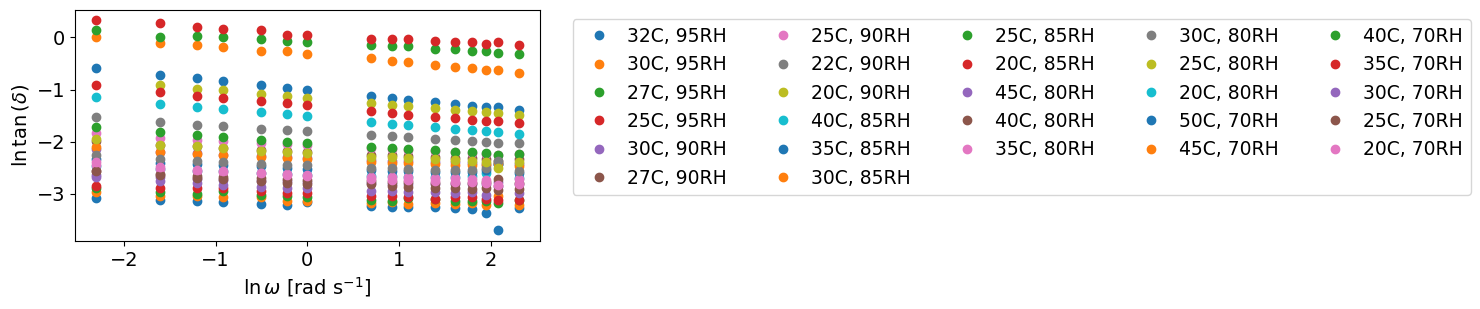

In [7]:
# List of files containing emulsion data at various concentrations
filenames = [
    './data/time-temp-water/ttw_95_32.csv',
    './data/time-temp-water/ttw_95_30.csv',
    './data/time-temp-water/ttw_95_27.csv',
    './data/time-temp-water/ttw_95_25.csv',
    './data/time-temp-water/ttw_90_30.csv',
    './data/time-temp-water/ttw_90_27.csv',
    './data/time-temp-water/ttw_90_25.csv',
    './data/time-temp-water/ttw_90_22.csv',
    './data/time-temp-water/ttw_90_20.csv',
    './data/time-temp-water/ttw_85_40.csv',
    './data/time-temp-water/ttw_85_35.csv',
    './data/time-temp-water/ttw_85_30.csv',
    './data/time-temp-water/ttw_85_25.csv',
    './data/time-temp-water/ttw_85_20.csv',
    './data/time-temp-water/ttw_80_45.csv',
    './data/time-temp-water/ttw_80_40.csv',
    './data/time-temp-water/ttw_80_35.csv',
    './data/time-temp-water/ttw_80_30.csv',
    './data/time-temp-water/ttw_80_25.csv',
    './data/time-temp-water/ttw_80_20.csv',
    './data/time-temp-water/ttw_70_50.csv',
    './data/time-temp-water/ttw_70_45.csv',
    './data/time-temp-water/ttw_70_40.csv',
    './data/time-temp-water/ttw_70_35.csv',
    './data/time-temp-water/ttw_70_30.csv',
    './data/time-temp-water/ttw_70_25.csv',
    './data/time-temp-water/ttw_70_20.csv',
]

# Define column names and initialize lists for storing data
# Column names for the data files
columns = ['Angular Frequency', 'Storage Modulus', 'Loss Modulus']

# Lists to hold log-transformed data
omega_log_list = []
G_prime_log_list = []
G_double_prime_log_list = []
tan_delta_log_list = []
temp_list = []
humidity_list = []

# Initialize figure for visualization
plt.figure(figsize=(6, 3))

# Loop through each file and process the data
for i, filename in enumerate(filenames):
    # Load the data from the CSV file
    data = pd.read_csv(filename, decimal='.', encoding='utf-8', sep=',')
    data = data.dropna()
    data.columns = columns

    # Extract and log-transform the 'Angular Frequency' and 'Relaxation Modulus' columns
    log_interval_omega = np.log(data['Angular Frequency'])
    log_storage_modulus = np.log(data['Storage Modulus'])
    log_loss_modulus = np.log(data['Loss Modulus'])

    # Append the log-transformed data to the lists
    omega_log_list.append(np.array(log_interval_omega))
    G_prime_log_list.append(np.array(log_storage_modulus))
    G_double_prime_log_list.append(np.array(log_loss_modulus))

    # Get tan delta and append it
    log_tan_delta = log_loss_modulus - log_storage_modulus
    tan_delta_log_list.append(np.array(log_tan_delta))

    # Extract the temperature and humidity from the filename
    match = re.search(r'_(\d+)_([^_]+)\.csv$', filename)  # Regex to capture temperature and humidity
    if match:
        humidity = int(match.group(1))  # Extract the temperature as an integer
        temp = int(match.group(2))  # Extract the humidity as an integer
        temp_list.append(temp)
        humidity_list.append(humidity)
        plt.plot(log_interval_omega, log_tan_delta, 'o', label=f'{temp}C, {humidity}RH')
    else:
        temp_list.append(None)  # Append None if the temperature and humidity are not found
        humidity_list.append(None)

# Finalize the plot
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$\ln \omega$ [rad s$^{-1}$]', fontsize=14)
plt.ylabel(r'$\ln \tan{(\delta)}$', fontsize=14)
plt.legend(fontsize=13.5, handletextpad=0.5, ncol=5, bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# Construct master curve of temperature levels
1. Use the `MasterCurve` class to build a master curve for the data.


/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 o

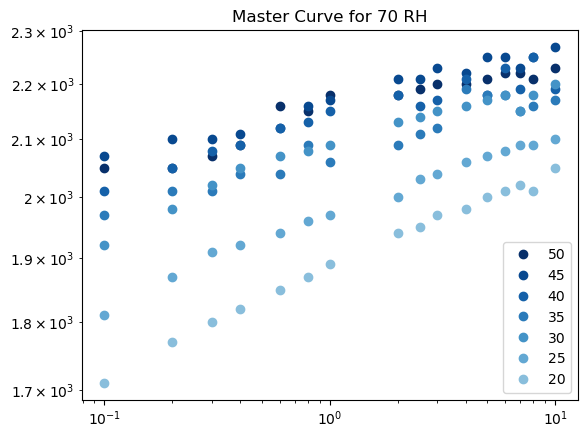

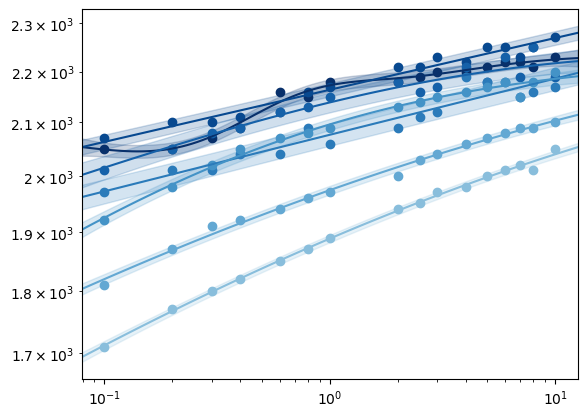

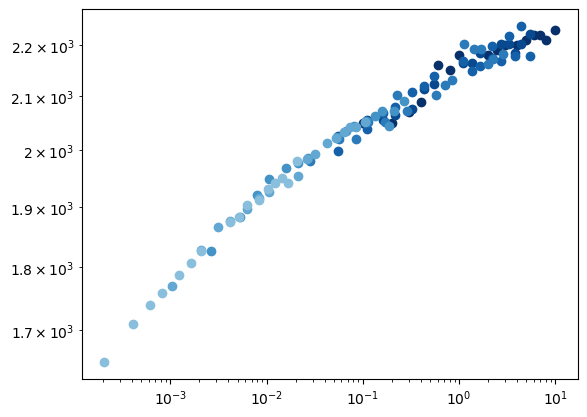

/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter 

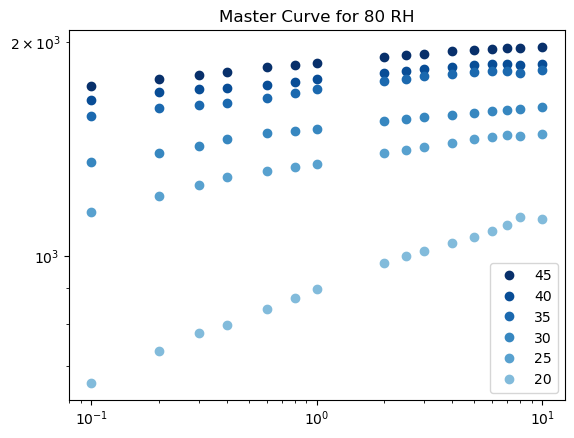

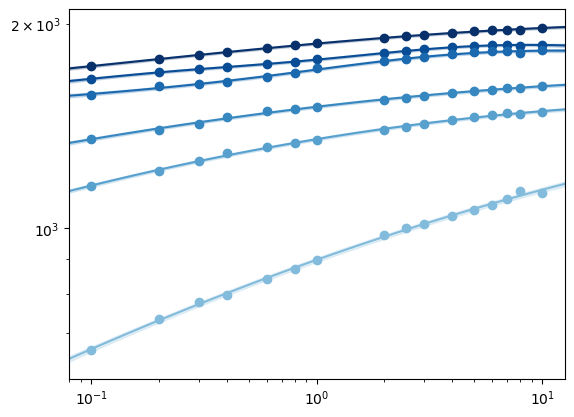

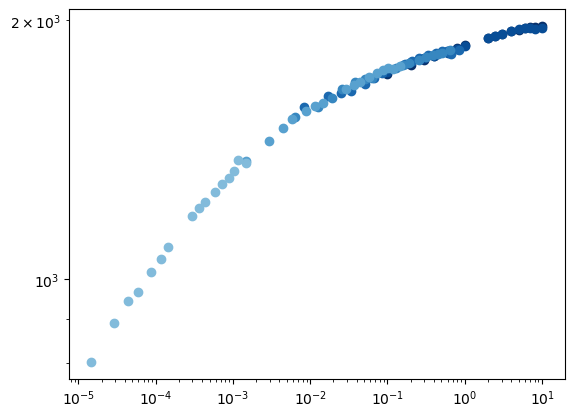

/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 o

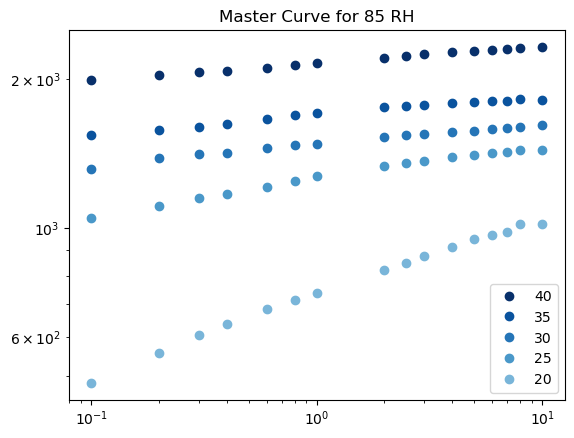

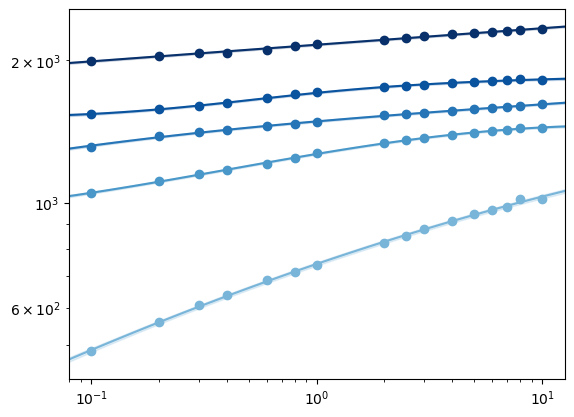

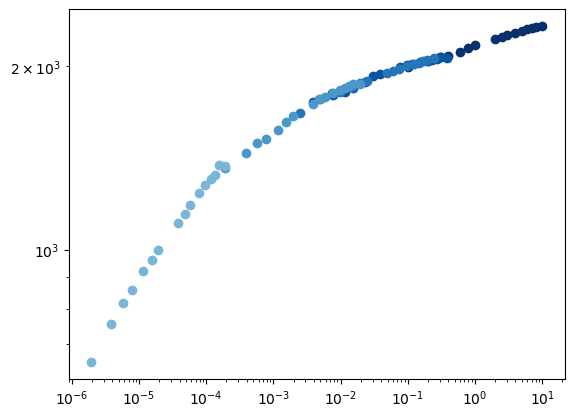

/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of param

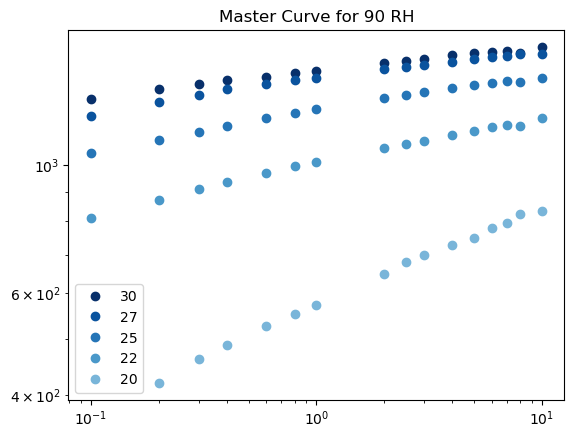

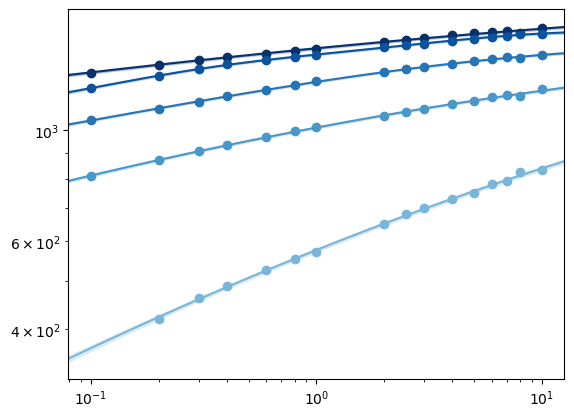

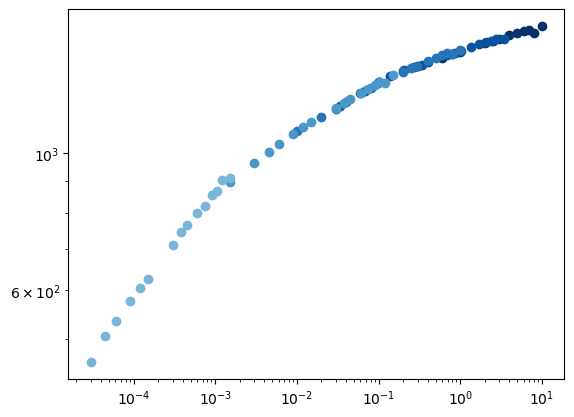

/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNOR

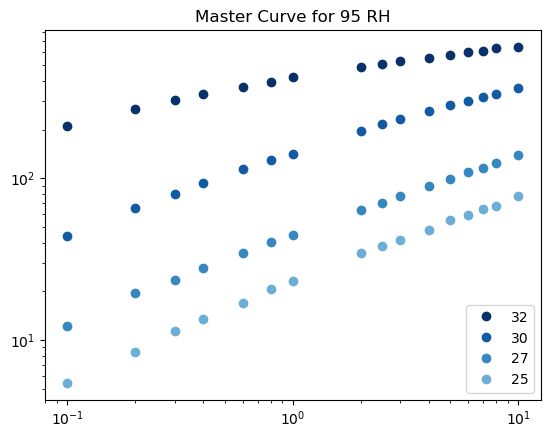

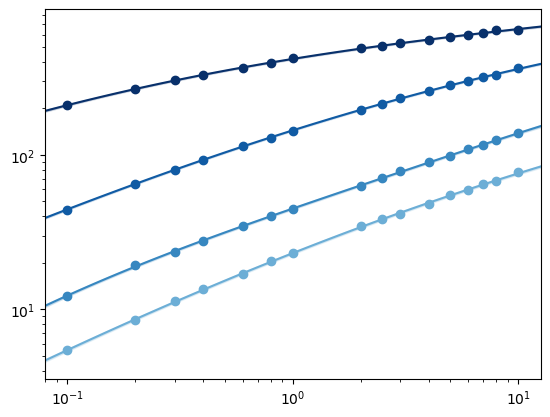

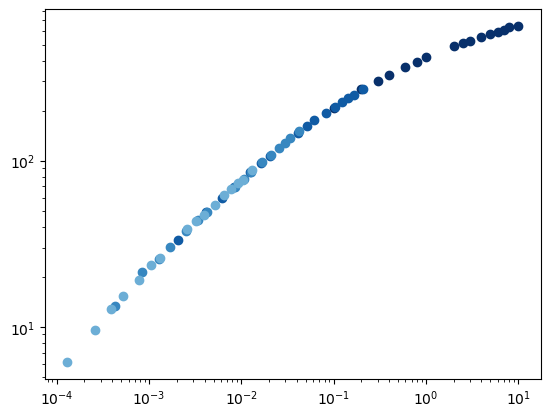

Humidity 70 RH:
  Horizontal shift factors: [ 0.         -0.60471932 -0.60471998 -1.25594631 -3.62413139 -4.55618989
 -6.18428036]
  Vertical shift factors: [ 0.         -0.02112756 -0.00518368  0.00561229 -0.05061061 -0.02286385
 -0.03470993]

Humidity 80 RH:
  Horizontal shift factors: [ 0.          0.         -2.47451121 -2.75013192 -4.22397117 -8.82914136]
  Vertical shift factors: [0.         0.05076121 0.00930348 0.12964338 0.1745159  0.19273748]

Humidity 85 RH:
  Horizontal shift factors: [  0.          -3.25606835  -3.70811386  -6.25049744 -10.85566762]
  Vertical shift factors: [0.         0.12682286 0.24459373 0.26197373 0.2990642 ]

Humidity 90 RH:
  Horizontal shift factors: [ 0.         -1.0730072  -2.30544558 -4.19654401 -8.8017142 ]
  Vertical shift factors: [ 0.         -0.01887016  0.03385925  0.10128065  0.09193951]

Humidity 95 RH:
  Horizontal shift factors: [ 0.         -3.88215869 -5.46373229 -6.64220537]
  Vertical shift factors: [ 0.         -0.28773509  0.0901

In [8]:
from mastercurves import MasterCurve
from mastercurves.transforms import Multiply
from sklearn.gaussian_process.kernels import RationalQuadratic, WhiteKernel, ConstantKernel
import numpy as np

# Create a unique list of humidity levels
unique_humidities = sorted(set(humidity_list), reverse=False)

# Initialize lists to store shift factors and shifted data
hshift_factors_all = []
vshift_factors_all = []

shifted_omega_all = []
shifted_G_prime_all = []
shifted_G_double_prime_all = []
shifted_tan_delta_all = []

# Loop through each unique humidity and process the data separately
for humidity in unique_humidities:
    # Filter the data for the current humidity level
    omega_log_humidity = []
    tan_delta_log_humidity = []
    temp_humidity = []
    G_prime_log_humidity = []
    G_double_prime_log_humidity = []

    for omega_log, G_prime_log, G_double_prime_log, tan_delta_log, temp, hum in zip(omega_log_list, G_prime_log_list, G_double_prime_log_list, tan_delta_log_list, temp_list, humidity_list):
        if hum == humidity:
            omega_log_humidity.append(omega_log)
            G_prime_log_humidity.append(G_prime_log)
            G_double_prime_log_humidity.append(G_double_prime_log)
            tan_delta_log_humidity.append(tan_delta_log)
            temp_humidity.append(temp)
    
    # Build a master curve for the current humidity level
    mc = MasterCurve()

    # Set kernel for Gaussian Process (Rational Quadratic with other kernels)
    mc.set_gp_kernel(RationalQuadratic() * ConstantKernel() + ConstantKernel() + WhiteKernel())

    # Add the data: omega_log_humidity (angular frequency), tan_delta_log_humidity, and temp_humidity (temperature)
    mc.add_data(omega_log_humidity, G_prime_log_humidity, temp_humidity)

    # Apply horizontal (temperature) and vertical (modulus) transformations for the master curve method
    mc.add_htransform(Multiply(scale="log"))  # Horizontal transform on log scale
    mc.add_vtransform(Multiply(scale="log"))  # Vertical transform on log scale

    # Perform superposition
    mc.superpose()

    # Change reference state (temperature) if needed
    mc.change_ref(temp_humidity.index(30))

    # Extract shift parameters from the master curve
    a = mc.hparams[0]
    b = mc.vparams[0]

    hshift_factors = []
    vshift_factors = []

    # Loop to store them as a list of arrays
    for shift_factor in a:
        hshift_factors.append(np.array((np.log(shift_factor))))

    for shift_factor in b:
        vshift_factors.append(np.array((np.log(shift_factor))))

    # Store the shift factors for the current humidity level
    hshift_factors_all.append(np.array((hshift_factors)))
    vshift_factors_all.append(np.array((vshift_factors)))

    # Initialize lists to store shifted data for the current humidity level
    shifted_omega = []
    G_prime = []
    G_double_prime = []
    tan_delta = []

    # Now, apply the shift factors correctly by using the filtered data
    for idx, (omega_log, G_prime_log, G_double_prime_log, tan_delta_log) in enumerate(zip(omega_log_humidity, G_prime_log_humidity, G_double_prime_log_humidity, tan_delta_log_humidity)):

        # Apply the corresponding shift factors
        shifted_omega_log = omega_log + hshift_factors[idx]
        shifted_G_prime_log = G_prime_log + vshift_factors[idx]
        shifted_G_double_prime_log = G_double_prime_log + vshift_factors[idx]
        shifted_tan_delta_log = tan_delta_log + vshift_factors[idx]

        # Store the shifted data
        shifted_omega.append(shifted_omega_log)
        G_prime.append(shifted_G_prime_log)
        G_double_prime.append(shifted_G_double_prime_log)
        tan_delta.append(shifted_tan_delta_log)
    
    # Concatenate the arrays along the first axis (flatten the list of arrays)
    shifted_omega = np.concatenate(shifted_omega)
    G_prime = np.concatenate(G_prime)
    G_double_prime = np.concatenate(G_double_prime)
    tan_delta = np.concatenate(tan_delta)

    # Store the shifted data for this humidity level
    shifted_omega_all.append(np.array(shifted_omega))
    shifted_G_prime_all.append(np.array(G_prime))
    shifted_G_double_prime_all.append(np.array(G_double_prime))
    shifted_tan_delta_all.append(np.array(tan_delta))

    # Quick plot of the MasterCurve to visualize the result
    fig1, ax1, fig2, ax2, fig3, ax3 = mc.plot(colormap=lambda i: plt.cm.Blues_r(i / 1.5))
    
    # Add a title to indicate the humidity level
    ax1.set_title(f'Master Curve for {humidity} RH')

    # Show the plot for each humidity level
    plt.show()

# After the loop, you can now access the stored shift factors and shifted data for each humidity
# For example, to print the stored shift factors for each humidity:
for i, humidity in enumerate(unique_humidities):
    print(f"Humidity {humidity} RH:")
    print(f"  Horizontal shift factors: {hshift_factors_all[i]}")
    print(f"  Vertical shift factors: {vshift_factors_all[i]}")
    print()
    
# Print the shapes of the arrays to confirm data structure
print("Number of datasets:", len(shifted_omega_all))

# Print sizes of individual datasets to understand structure
for idx, (omega_log, tan_delta_log) in enumerate(zip(shifted_omega_all, shifted_tan_delta_all)):
    print(f"Dataset: {omega_log.shape} (omega), {tan_delta_log.shape} (Tan Delta)")

#print(shifted_omega_all)

# Master curve of humidity levels


Length of shifted_omega_all: 5
Length of shifted_tan_delta_all: 5


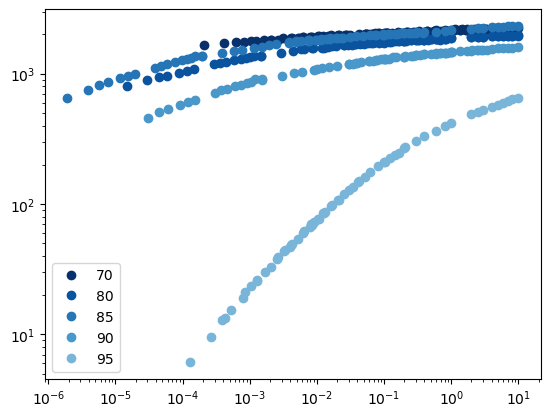

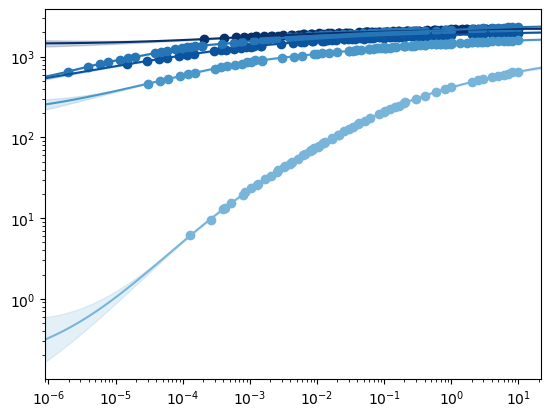

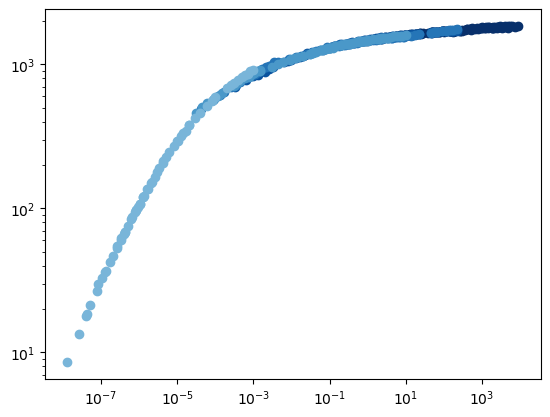

In [9]:
from mastercurves import MasterCurve
from mastercurves.transforms import Multiply
from sklearn.gaussian_process.kernels import RationalQuadratic, WhiteKernel, ConstantKernel

print(f"Length of shifted_omega_all: {len(shifted_omega_all)}")
print(f"Length of shifted_tan_delta_all: {len(shifted_tan_delta_all)}")

humidity = [70, 80, 85, 90, 95]

# Build a master curve. We use tan delta to estimate the shift factors then will apply them to the storage and loss modulus data
mc_all = MasterCurve()

# Set kernel for Gaussian Process (Rational Quadratic with other kernels)
mc_all.set_gp_kernel(RationalQuadratic() * ConstantKernel() + ConstantKernel() + WhiteKernel())

# Add the data: omega_log_list (angular frequency), tan_delta_log_list, and temp_list (temperature)
mc_all.add_data(shifted_omega_all, shifted_G_prime_all, humidity)

# Apply horizontal (temperature) and vertical (modulus) transformations for the master curve method
mc_all.add_htransform(Multiply(scale="log", bounds=(1E-4,1)))  # Horizontal transform on log scale
mc_all.add_vtransform(Multiply(scale="log"))  # Horizontal transform on log scale

# Perform superposition
mc_all.superpose()

# Change the reference temperature to 25C, according to the paper
mc_all.change_ref(90)

# Quick plot of the MasterCurve to visualize the result
fig1, ax1, fig2, ax2, fig3, ax3 = mc_all.plot(colormap=lambda i: plt.cm.Blues_r(i / 1.5))

# Extract shift factors to data


In [10]:
# Extract shift parameters
a = mc_all.hparams[0]
b = mc_all.vparams[0]

hshift_factors = []

# Loop to store them as a list of arrays
for shift_factor in a:
    hshift_factors.append(np.array((np.log(shift_factor))))

# Initialize lists to store shift factors
vshift_factors = []

for shift_factor in b:
    vshift_factors.append(np.log(shift_factor))  # Log transform the vertical shift factors

# Create a single array to analyze it with pyRheo
shifted_omega_final = []
shifted_G_prime_final = []
shifted_G_double_prime_final = []
shifted_tan_delta_final = []

for idx, (omega_log, G_prime_log, G_double_prime_log, tan_delta_log) in enumerate(zip(shifted_omega_all, shifted_G_prime_all, shifted_G_double_prime_all, shifted_tan_delta_all)):

    # Apply shift factor
    shifted_omega_log = omega_log + hshift_factors[idx]
    shifted_G_prime_log = G_prime_log + vshift_factors[idx]
    shifted_G_double_prime_log = G_double_prime_log + vshift_factors[idx]
    shifted_tan_delta_log = tan_delta_log + vshift_factors[idx]

    
    # Convert log data back to linear scale and concatenate
    shifted_omega_final.append(np.array(shifted_omega_log))
    shifted_G_prime_final.append(np.array(shifted_G_prime_log))
    shifted_G_double_prime_final.append(np.array(shifted_G_double_prime_log))
    shifted_tan_delta_final.append(np.array(shifted_tan_delta_log))

In [11]:
# Create a single array to analyze it with pyRheo
shifted_omega_final_c = []
shifted_G_prime_final_c = []
shifted_G_double_prime_final_c = []
shifted_tan_delta_final_c = []

for idx, (omega_log, G_prime_log, G_double_prime_log, tan_delta_log) in enumerate(zip(shifted_omega_all, shifted_G_prime_all, shifted_G_double_prime_all, shifted_tan_delta_all)):

    # Apply shift factor
    shifted_omega_log = omega_log + hshift_factors[idx]
    shifted_G_prime_log = G_prime_log + vshift_factors[idx]
    shifted_G_double_prime_log = G_double_prime_log + vshift_factors[idx]
    shifted_tan_delta_log = tan_delta_log + vshift_factors[idx]

    # Convert log data back to linear scale and concatenate
    shifted_omega_final_c = np.concatenate([shifted_omega_final_c, np.exp(shifted_omega_log)])
    shifted_G_prime_final_c = np.concatenate([shifted_G_prime_final_c, np.exp(shifted_G_prime_log)])
    shifted_G_double_prime_final_c = np.concatenate([shifted_G_double_prime_final_c, np.exp(shifted_G_double_prime_log)])
    shifted_tan_delta_final_c = np.concatenate([shifted_tan_delta_final_c, np.exp(shifted_tan_delta_log)])

# Organize and visualize shifted data
1. Create a DataFrame from the shifted angular frequency and moduli arrays.
2. Clean the data by removing NaN values.
3. Reorder the DataFrame by shear rate for consistent visualization.
4. Plot the shifted data to validate the alignment from the master curve transformation.


   Angular Frequency    G_prime  G_double_prime
0       1.304148e-08   8.605971       11.964880
1       2.608296e-08  13.403815       17.791821
2       3.912444e-08  17.906149       21.942312
3       4.237710e-08  18.569972       21.586723
4       5.216592e-08  21.396894       25.304560


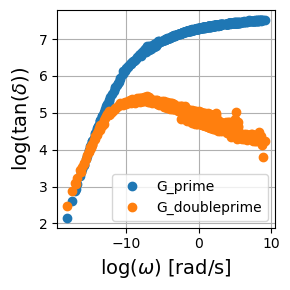

In [12]:
# Create a DataFrame to analyze the data after superposition
df = pd.DataFrame({'Angular Frequency': shifted_omega_final_c, 'G_prime': shifted_G_prime_final_c, 'G_double_prime': shifted_G_double_prime_final_c})

# Clean NaNs (if any) and reorder the data by 'Angular Frequency'
df_cleaned = df.dropna()
df_sorted = df_cleaned.sort_values(by='Angular Frequency', ascending=True).reset_index(drop=True)

# Show the cleaned and sorted DataFrame (optional)
print(df_sorted.head())

# The final plot for visualization
plt.figure(figsize=(3, 3))
plt.plot(np.log(df_sorted['Angular Frequency']), np.log(df_sorted['G_prime']), 'o', label='G_prime')
plt.plot(np.log(df_sorted['Angular Frequency']), np.log(df_sorted['G_double_prime']), 'o', label='G_doubleprime')

plt.xlabel(r'$\log(\omega)$ [rad/s]', fontsize=14)
plt.ylabel(r'$\log(\tan(\delta))$', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit model to master curve with pyRheo

1. The master curve data (oscillation and moduli) is used for model fitting.
2. The `pyRheo` library is employed to fit a FractionalZenerLiquidD model.
3. The model parameters, fitting error, and predictions are displayed.


/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/rheo_models/oscillation_models.py:207: RuntimeWarning: overflow encountered in scalar power
  tau_c = (V / G) ** (1 / (alpha - beta))
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/rheo_models/oscillation_models.py:227: RuntimeWarning: invalid value encountered in divide
  G_prime = G_c * (numerator_G_prime / denominator)
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/rheo_models/oscillation_models.py:228: RuntimeWarning: invalid value encountered in divide
  G_double_prime = G_c * (numerator_G_double_prime / denominator)
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/rheo_models/oscillation_models.py:208: RuntimeWarning: divide by zero encountered in scalar power
  G_c = V * (tau_c ** (-alpha))
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/rheo_models/oscillation_models.py:212: RuntimeWarning: divide by zero encountered in power
  omega_tau_c_alpha_minus_beta = omega_tau_c ** (alpha - beta)
/m/home

Best initial guess was: [100032.09413835048, 138931.08919037774, 0.1548360964230232, 0.07430819720750506]
G: 1610.209239956061
V: 30688.79006389717
alpha: 0.3978026547929461
beta: 0.02768494393642259
RSS: 20.747054425054543
Mean Percentage Error: 11.55%


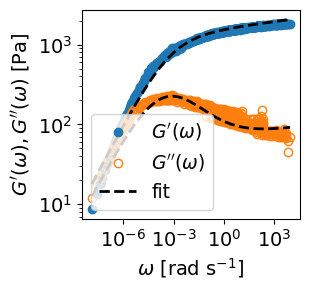

In [13]:
from pyRheo.oscillation_model import OscillationModel

# Load data
omega_mc = df_sorted['Angular Frequency'].values
G_prime_mc = df_sorted['G_prime'].values
G_double_prime_mc = df_sorted['G_double_prime'].values

# Downsample 'Angular Frequency' and 'G_relax' by selecting every xth row
omega = omega_mc[::1]
G_prime = G_prime_mc[::1]
G_double_prime = G_double_prime_mc[::1]

# Model fitting
model = OscillationModel(model="FractionalMaxwell", initial_guesses="random", num_initial_guesses=10, minimization_algorithm="Powell")
model.fit(omega, G_prime, G_double_prime)

model.print_parameters()
model.print_error()
model.plot(omega, G_prime, G_double_prime, savefig=False)

# Plot the master curve with colors and fitted prediction
1. Use the previously calculated horizontal (`hshift_factors`) and vertical (`vshift_factors`) shift factors to align data from multiple datasets.
2. Load the datasets and apply transformations to angular frequency and moduli using the shift factors.
3. Generate a color-coded plot for each dataset showing the aligned data.
4. Overlay the master curve prediction from the fitted model for comparison.
5. Customize the plot with labels, scales, and legends, and save the final visualization.


/tmp/ipykernel_155322/2812838816.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20c', 9)


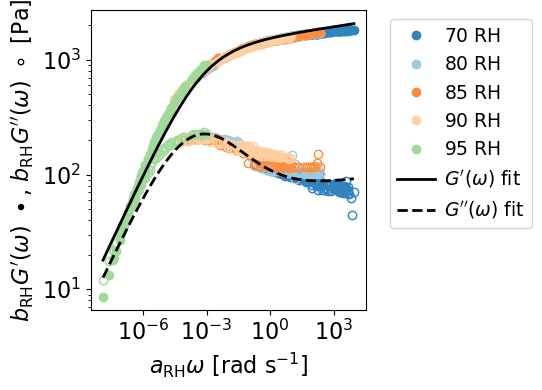

In [14]:
from matplotlib import cm

# Plot master curve labeled with the model prediction
omega_predict = np.logspace(np.min(np.log10(omega)), np.max(np.log10(omega)), 100)
G_prime_predict, G_double_prime_predict = model.predict(omega_predict)

# Plot shifted data
plt.figure(figsize=(5.6, 4))

# Reordered labels based on temperatures (minimum temperature first)
labels = [
    "$70$ RH", "$80$ RH", "$85$ RH", "$90$ RH",
    "$95$ RH"
]

# Generate colors using a colormap
colormap = cm.get_cmap('tab20c', 9)
colors = [colormap(i) for i in range(len(shifted_omega_final))]

for idx, (shifted_omega, shifted_G_prime, shifted_G_double_prime) in enumerate(zip(shifted_omega_final, shifted_G_prime_final, shifted_G_double_prime_final)):
    plt.plot(np.exp(shifted_omega), np.exp(shifted_G_prime), 'o', color=colors[idx], markersize=6, label=labels[idx])
    plt.plot(np.exp(shifted_omega), np.exp(shifted_G_double_prime), 'o', color=colors[idx], fillstyle='none', markersize=6)

# Plot prediction
plt.plot(omega_predict, G_prime_predict, '-', color="k", lw=2, label='$G^{\prime}(\omega)$ fit')
plt.plot(omega_predict, G_double_prime_predict, '--', color="k", lw=2, label='$G^{\prime \prime}(\omega)$ fit')

# Customize the plot
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$a_{\rm{RH}} \omega$ [rad s$^{-1}$]', fontsize=16)
plt.ylabel(r'$b_{\rm{RH}}G^{\prime}(\omega)~\bullet$, $b_{\rm{RH}}G^{\prime \prime}(\omega)~\circ$ [Pa]', fontsize=16)
plt.legend(fontsize=13.5, loc='best', handletextpad=0.5, bbox_to_anchor=(1.05,1))
plt.grid(False)
plt.tight_layout()
plt.savefig("viscoelastic_material_oscillation_mc.pdf", format="pdf", bbox_inches='tight')
plt.show()